## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [23]:
%matplotlib inline

In [3]:
# Display mouse data
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
capomulin_study = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
capomulin_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice. nunique for a count of field, unique for the entire list of field
no_mice = capomulin_study['Mouse ID'].nunique()
no_mice

249

In [7]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
# finding the ID for mice that have duplicate time points
id_mice = capomulin_study.loc[capomulin_study.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
id_mice


array(['g989'], dtype=object)

In [8]:
# Optional: Display all the data for the duplicate mouse ID. 
capomulin_study.loc[capomulin_study['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
#cl_capomulin_study = capomulin_study.drop_duplicates(subset=None)
cl_capomulin_study = capomulin_study[capomulin_study['Mouse ID'].isin(id_mice)==False]

In [10]:
# Checking the number of mice in the clean DataFrame.
cl_no_mice = cl_capomulin_study['Mouse ID'].nunique()
cl_no_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
# create the statistics for table
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe
tot_mean = cl_capomulin_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tot_median = cl_capomulin_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tot_var = cl_capomulin_study.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tot_std = cl_capomulin_study.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tot_sem = cl_capomulin_study.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# create df by putting them together 
tot_df = pd.DataFrame({'Mean' :tot_mean,
                      'Median' :tot_median,
                      'Variance' :tot_var,
                      'Standard Deviation' :tot_std,
                      'SEM' :tot_sem})
tot_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
cl_capomulin_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:>

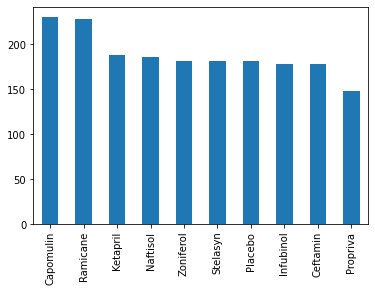

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#.plot 
counts_drug = cl_capomulin_study['Drug Regimen'].value_counts()
counts_drug.plot(kind='bar')

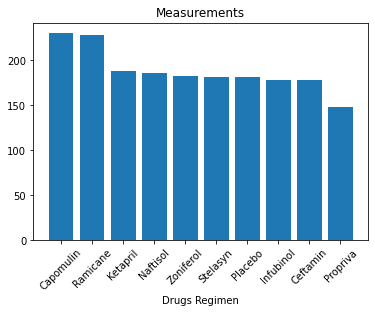

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#plt.
plt.bar(counts_drug.index.values,counts_drug.values)
plt.xticks(rotation=45)
plt.title("Measurements")
plt.xlabel("Drugs Regimen")
plt.show()


<AxesSubplot:ylabel='Sex'>

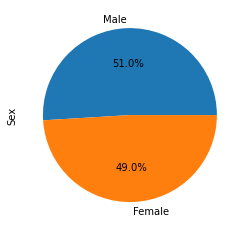

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts_sex = cl_capomulin_study['Sex'].value_counts()
counts_sex.plot(kind='pie',autopct="%1.1f%%")

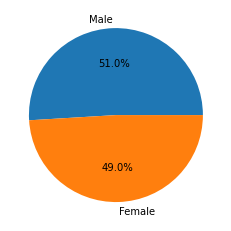

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#counts_sex

plt.pie(counts_sex.values,labels=counts_sex.index.values,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [18]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
